# COVID-19 History in Georgia Visualization

*Data from http://covidtracking.com*

In [2]:
import pandas as pd
import io
import requests

url = "https://covidtracking.com/data/download/georgia-history.csv"

s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [15]:
sorted_data = data.sort_values(by=['date'], ascending=True)
sorted_data

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
259,2020-03-04,GA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
258,2020-03-05,GA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
257,2020-03-06,GA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
256,2020-03-07,GA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
255,2020-03-08,GA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-11-14,GA,A+,8956.0,8462.0,51,494.0,33216.0,33216.0,2050.0,...,3865939,27389,344853.0,NaN,NaN,NaN,NaN,0,3865939,27389
3,2020-11-15,GA,A+,8957.0,8462.0,1,495.0,33241.0,33241.0,1978.0,...,3887286,21347,345943.0,NaN,NaN,NaN,NaN,0,3887286,21347
2,2020-11-16,GA,A+,8967.0,8471.0,10,496.0,33265.0,33265.0,2070.0,...,3900708,13422,346476.0,NaN,NaN,NaN,NaN,0,3900708,13422
1,2020-11-17,GA,A+,9008.0,8496.0,41,512.0,33439.0,33439.0,2102.0,...,3954422,53714,347926.0,NaN,NaN,NaN,NaN,0,3954422,53714


<AxesSubplot:xlabel='date'>

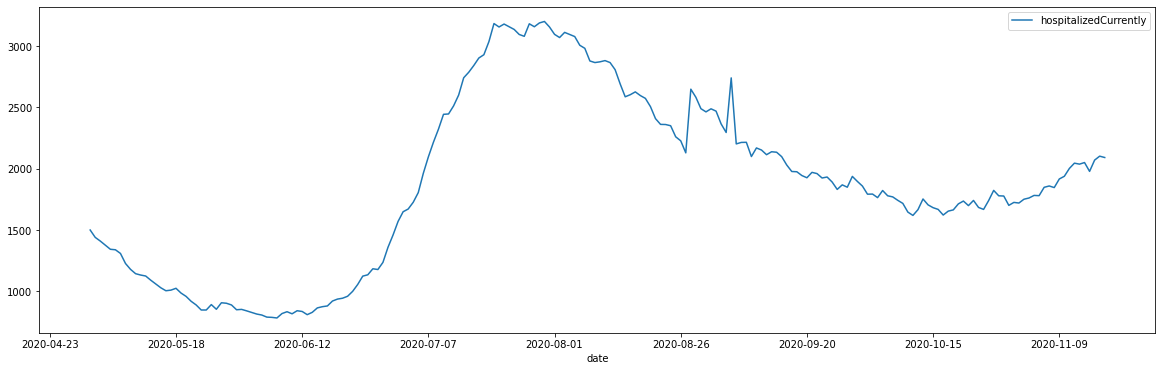

In [23]:
sorted_data.plot(x='date', y='hospitalizedCurrently', figsize=(20,6))

The above data is taken from [https://covidtracking.com/data/state/georgia](https://covidtracking.com/data/state/georgia)